# Examen de Certificación – Intento 3

## Fundamentos de Data Science

### Analizando la Rotación de Clientes en Telecomunicaciones

### Requisitos:

Tu tarea es limpiar y explorar un dataset para los ejecutivos de una empresa de telecomunicaciones que describe tendencias en la rotación de sus clientes.

### El dataset puede ser encontrado aquí.

### Limpieza de datos con Python:
* Identificar y solucionar cualquier valor duplicado.
* Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
* Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).
* Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.
* Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).
### Exploración de datos con Python:
* Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
* Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

### Datos

* CustomerID: A unique ID that identifies each customer.
* Gender: The customer’s gender: Male, Female
* Senior Citizen: Indicates if the customer is 65 or older: Yes, No
* Partner: Whether the customer has a partner or not (Yes, No)
* Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
* tenure: Number of months the customer has stayed with the company
* PhoneService: Whether the customer has a phone service or not (Yes, No)
* MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
* Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
* Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
* Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
* Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
* Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
* Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No
* Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
* Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
* Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
* Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

### Importamos librerias y el dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [3]:
path = '../data/Telecom.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Deteccion y Eliminacion de duplicados

In [5]:
duplicados = df.duplicated() # Identificar duplicados
num_duplicados = duplicados.sum() # Contar el número de duplicados
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


### Verifacion de tipos de datos y conversion

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#df['work_year'] = pd.to_datetime(df['work_year'].astype(str) + '-01-01')
df['gender'] = df.gender.astype('category')
df['SeniorCitizen'] = df.SeniorCitizen.astype('float64')
df['Partner'] = df.Partner.astype('category')
df['Dependents'] = df.Dependents.astype('category')
df['tenure'] = df.tenure.astype('float64')
df['PhoneService'] = df.PhoneService.astype('category')
df['MultipleLines'] = df.MultipleLines.astype('category')
df['InternetService'] = df.InternetService.astype('category')
df['OnlineSecurity'] = df.OnlineSecurity.astype('category')
df['OnlineBackup'] = df.OnlineBackup.astype('category')
df['DeviceProtection'] = df.DeviceProtection.astype('category')
df['TechSupport'] = df.TechSupport.astype('category')
df['StreamingTV'] = df.StreamingTV.astype('category')
df['StreamingMovies'] = df.StreamingMovies.astype('category')
df['Contract'] = df.Contract.astype('category')
df['PaperlessBilling'] = df.PaperlessBilling.astype('category')
df['PaymentMethod'] = df.PaymentMethod.astype('category')
df['MonthlyCharges'] = df.MonthlyCharges.astype('float64')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['Churn'] = df.Churn.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   float64 
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   float64 
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

### Identificar y solucionar cualquier inconsistencia

In [8]:
categorical_cols = df.select_dtypes(include=['category']).columns
categorical_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [9]:
#El siguiente codigo es una copia del analisis del Profesor Iker del Bootcamp de Data Science de 2024.


def limpiar_cadena(cadena):
    """
    Limpia una cadena de texto realizando las siguientes operaciones:
    1. Convierte todo el texto a minúsculas.
    2. Elimina caracteres no imprimibles antes de la primera letra y después de la última letra,
       pero mantiene los caracteres internos.
    3. Elimina paréntesis y su contenido al final de la cadena.
    
    Parámetros:
    - cadena (str): La cadena de texto a limpiar.
    
    Retorna:
    - str: La cadena limpia.
    """
    if isinstance(cadena, str):
        # 1. Convertir todo a minúsculas
        cadena = cadena.lower()
        
        # 2. Eliminar paréntesis y su contenido al final de la cadena
        cadena = re.sub(r'\s*\([^)]*\)\s*$', '', cadena)
        
        # 3. Eliminar caracteres no imprimibles antes de la primera letra y después de la última letra
        # Buscar la posición de la primera letra (a-z)
        primer_letra = re.search(r'[a-z]', cadena)
        # Buscar la posición de la última letra (a-z)
        ultima_letra = re.search(r'[a-z](?!.*[a-z])', cadena)
        
        if primer_letra and ultima_letra:
            inicio = primer_letra.start()
            fin = ultima_letra.end()
            cadena = cadena[inicio:fin]
        else:
            # Si no se encuentran letras, eliminar espacios en blanco
            cadena = cadena.strip()
        
        return cadena
    return cadena


# Aplicar la limpieza a las columnas categóricas
for col in categorical_cols:
    df[col] = df[col].apply(limpiar_cadena)
# Verificar los cambios
for col in categorical_cols:
    print(f"\nValores únicos después de limpieza en '{col}':")
    print(df[col].unique())



Valores únicos después de limpieza en 'gender':
['female', 'male']
Categories (2, object): ['female', 'male']

Valores únicos después de limpieza en 'Partner':
['yes', 'no']
Categories (2, object): ['no', 'yes']

Valores únicos después de limpieza en 'Dependents':
['no', 'yes']
Categories (2, object): ['no', 'yes']

Valores únicos después de limpieza en 'PhoneService':
['no', 'yes']
Categories (2, object): ['no', 'yes']

Valores únicos después de limpieza en 'MultipleLines':
['no phone service', 'no', 'yes']
Categories (3, object): ['no', 'no phone service', 'yes']

Valores únicos después de limpieza en 'InternetService':
['dsl', 'fiber optic', 'no']
Categories (3, object): ['dsl', 'fiber optic', 'no']

Valores únicos después de limpieza en 'OnlineSecurity':
['no', 'yes', 'no internet service']
Categories (3, object): ['no', 'no internet service', 'yes']

Valores únicos después de limpieza en 'OnlineBackup':
['yes', 'no', 'no internet service']
Categories (3, object): ['no', 'no inter

### Identificar y solucionar cualquier valor faltante en el dataset

In [10]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
TotalCharges,7032,11,0.16
customerID,7043,0,0.00
DeviceProtection,7043,0,0.00
MonthlyCharges,7043,0,0.00
PaymentMethod,7043,0,0.00
PaperlessBilling,7043,0,0.00
Contract,7043,0,0.00
StreamingMovies,7043,0,0.00
StreamingTV,7043,0,0.00
TechSupport,7043,0,0.00


Analizamos la columna con Nulos

In [11]:
df.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

<Axes: ylabel='TotalCharges'>

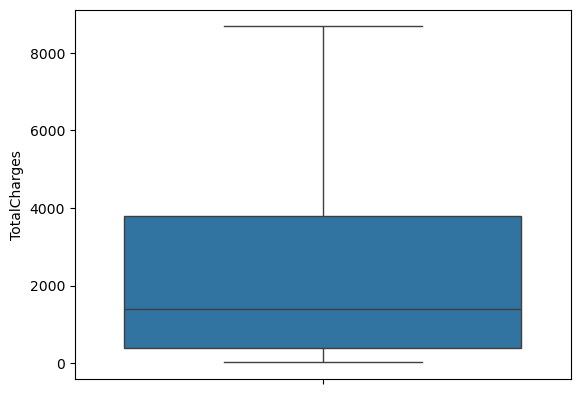

In [12]:
sns.boxplot(df.TotalCharges)

Dado que el promedio es representativo, decido usar eso para imputar los datos faltantes en la columna TotalCharges.

In [13]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

C:\Users\guill\AppData\Local\Temp\ipykernel_16644\1854230864.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


In [14]:
df.TotalCharges.describe()

count    7043.000000
mean     2283.300441
std      2265.000258
min        18.800000
25%       402.225000
50%      1400.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

Comparando con la informacion anterior, no hay mucha variabilidad con los datos ya imputados

### Solucionar cualquier punto de dato inapropiado o inusual

In [15]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']) #Agrupamos las columnas numéricas

In [16]:
print(numerical_cols.head())
print('-----------------------------------')
print(numerical_cols.describe())

   SeniorCitizen  tenure  MonthlyCharges  TotalCharges
0            0.0     1.0           29.85         29.85
1            0.0    34.0           56.95       1889.50
2            0.0     2.0           53.85        108.15
3            0.0    45.0           42.30       1840.75
4            0.0     2.0           70.70        151.65
-----------------------------------
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2265.000258
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1400.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


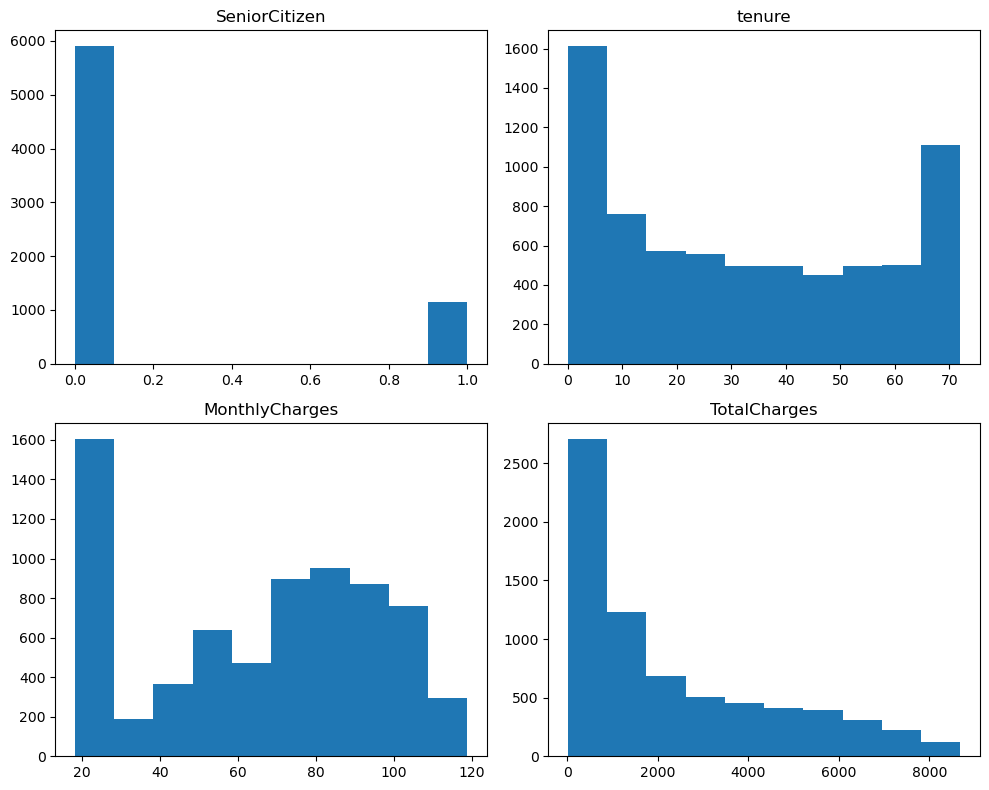

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # Crear una figura y subplots
axs = axs.flatten() # Aplanar la matriz de ejes para iterar fácilmente
# Iterar sobre las columnas y los ejes
for i, col in enumerate(numerical_cols):
    axs[i].hist(df[col])
    axs[i].set_title(col)

# Ajustar el layout para que no se solapen los subplots
plt.tight_layout()
plt.show()


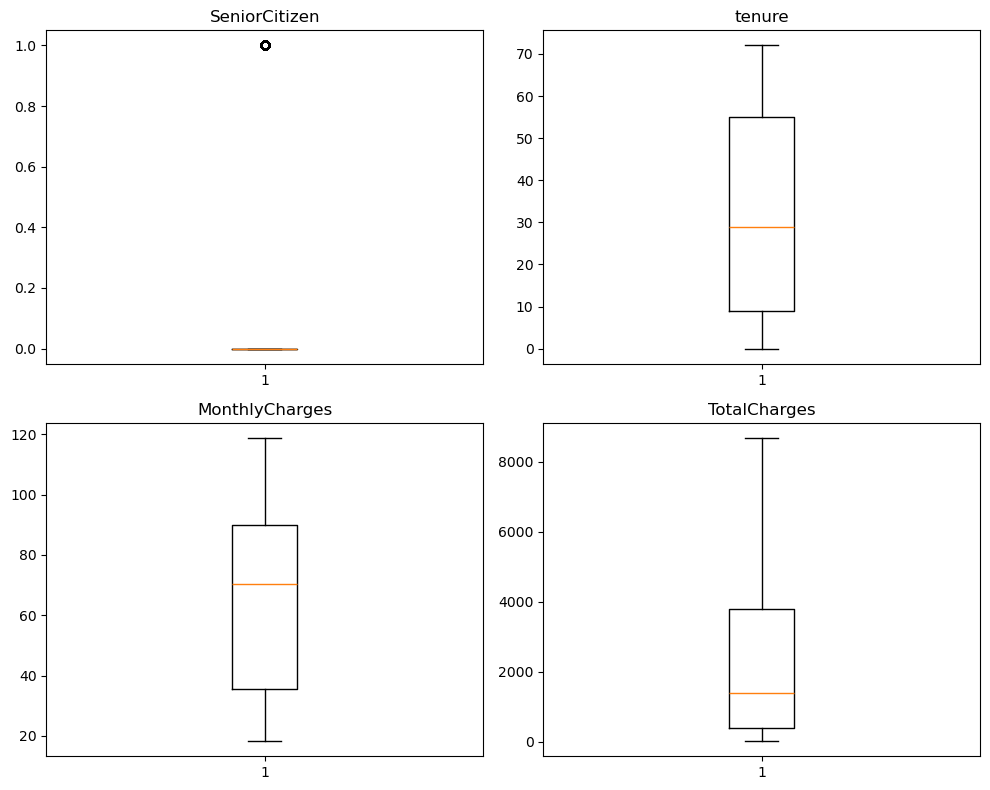

In [18]:
# Crear una figura y subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Aplanar la matriz de ejes para iterar fácilmente
axs = axs.flatten()

# Iterar sobre las columnas y los ejes
for i, col in enumerate(numerical_cols):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)

# Ajustar el layout para que no se solapen los subplots
plt.tight_layout()
plt.show()


Despues de analizar los datos de las columnas numericas decido no eliminar ningun valor anomalo, todos parecen estar en el rango normal, hay valores muy altos pero estos coinciden con las otras variables.

### Visualizaciones exploratorias

Crea diferentes tipos de visualizaciones tanto univariadas como multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código

C:\Users\guill\AppData\Local\Temp\ipykernel_16644\421457922.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped1 = df.groupby(['gender', 'Partner'])['TotalCharges'].mean().reset_index()# Agrupamos gender y TotalCharges


<Axes: xlabel='gender', ylabel='TotalCharges'>

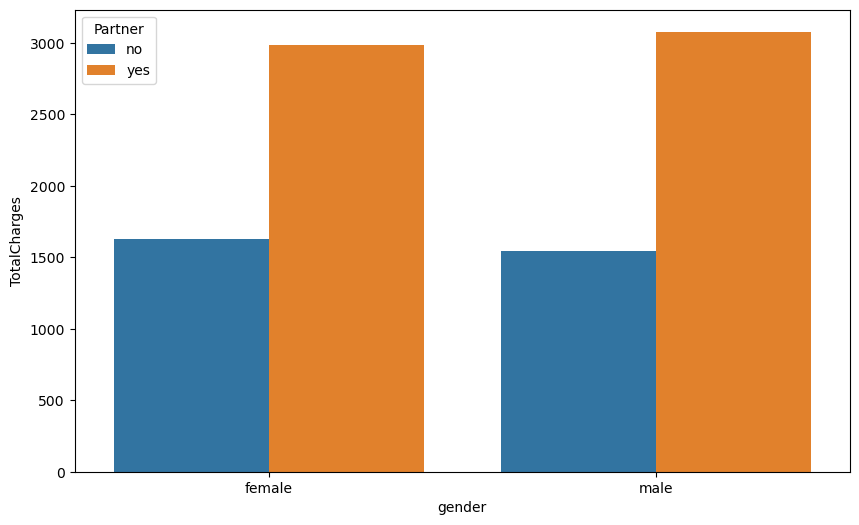

In [19]:
grouped1 = df.groupby(['gender', 'Partner'])['TotalCharges'].mean().reset_index()# Agrupamos gender y TotalCharges
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='TotalCharges', hue='Partner', data=grouped1)

La gráfica muestra que los clientes con pareja acumulan cargos totales más altos que los que no tienen pareja, independientemente del género. Esto sugiere que tener pareja podría estar relacionado con un mayor uso o duración de los servicios. Además, no se observa una diferencia significativa en los cargos totales entre hombres y mujeres.

In [20]:
df['tenure_segment'] = pd.qcut(df['tenure'], 4, labels=['Nuevo', 'Medio', 'Establecido', 'Leal'])
df['charge_segment'] = pd.qcut(df['MonthlyCharges'], 4, 
                                 labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])

C:\Users\guill\AppData\Local\Temp\ipykernel_16644\2435897421.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gruoped2 = df.groupby('gender')['charge_segment'].value_counts().reset_index()


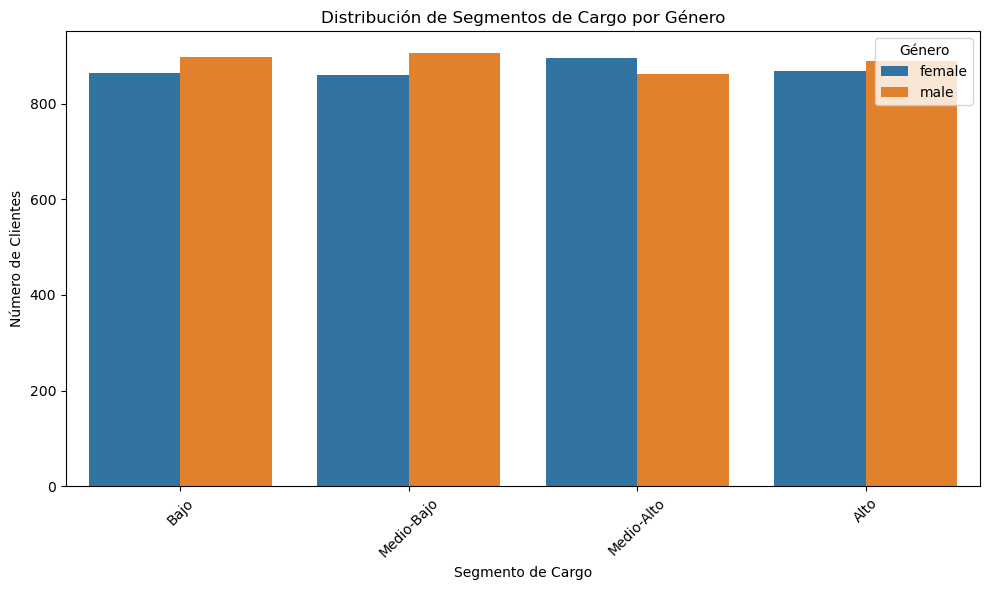

In [21]:
gruoped2 = df.groupby('gender')['charge_segment'].value_counts().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=gruoped2, x='charge_segment', y='count', hue='gender')

plt.title('Distribución de Segmentos de Cargo por Género')
plt.xlabel('Segmento de Cargo')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.tight_layout()
plt.show()


La gráfica muestra una distribución uniforme de clientes en cada segmento de cargo (bajo, medio-bajo, medio-alto, alto) sin diferencias significativas entre géneros. Esto sugiere que el género no influye en la categoría de cargo en la que los clientes se encuentran.

C:\Users\guill\AppData\Local\Temp\ipykernel_16644\3397637835.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped3 = df.groupby('Contract')['PaymentMethod'].value_counts().reset_index()


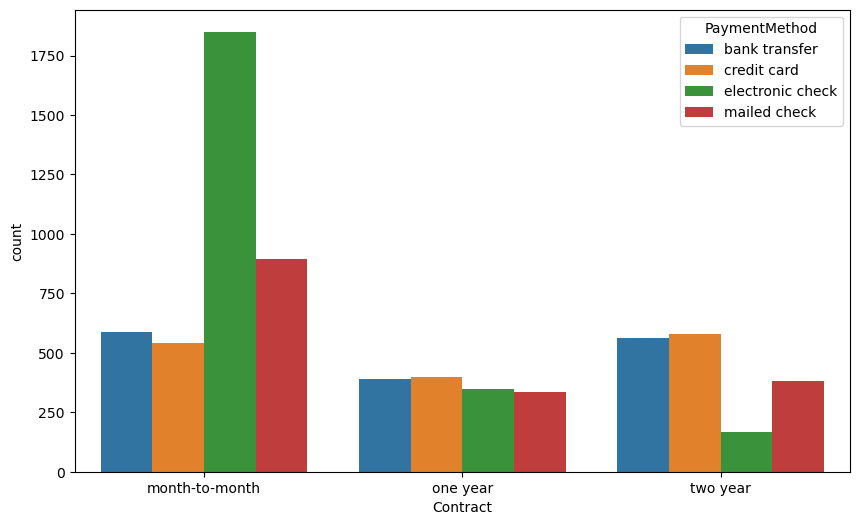

In [22]:
grouped3 = df.groupby('Contract')['PaymentMethod'].value_counts().reset_index()
grouped3.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x='Contract', y='count', hue='PaymentMethod', data=grouped3)
plt.show()

los clientes con contratos "mes a mes" prefieren pagar con cheque electrónico, seguido de cheque enviado por correo. En cambio, para contratos de un año o dos años, los métodos de pago están más equilibrados entre transferencia bancaria y tarjeta de crédito. Esto sugiere que los clientes de contratos cortos eligen métodos de pago más flexibles o fáciles de cancelar.

C:\Users\guill\AppData\Local\Temp\ipykernel_16644\4154551741.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped4 = df.groupby(['tenure_segment', 'InternetService']).size().reset_index(name='count')


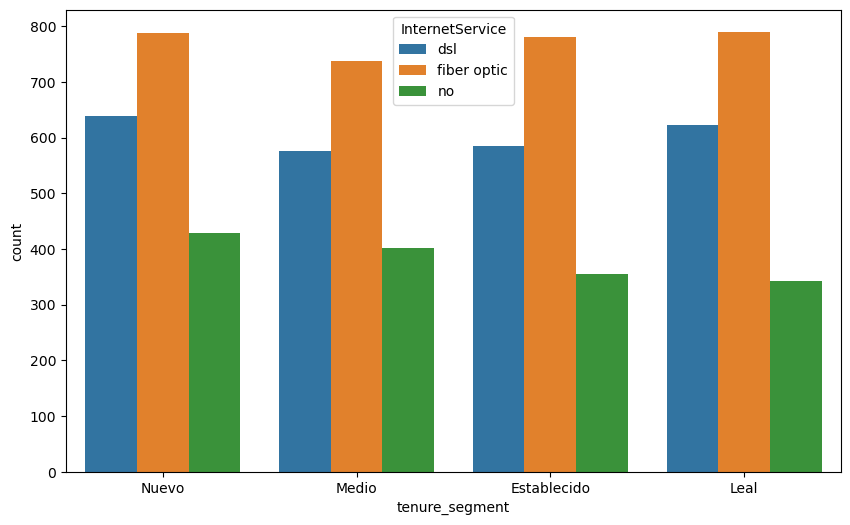

In [23]:
grouped4 = df.groupby(['tenure_segment', 'InternetService']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.barplot(x='tenure_segment', y='count', hue='InternetService', data=grouped4)
plt.show()


Representacion de la distribución de servicios de Internet a través de diferentes segmentos de permanencia (tenure_segment). Se observan cuatro categorías: Nuevo, Medio, Establecido y Leal. En cada segmento, hay tres tipos de servicios: DSL (azul), fibra óptica (naranja) y sin servicio (verde). La fibra óptica es el servicio más popular en todos los segmentos, con aproximadamente 800 usuarios en cada uno, mientras que DSL mantiene una presencia consistente de alrededor de 600 usuarios. Se nota una tendencia decreciente en la cantidad de clientes sin servicio de Internet (barra verde) a medida que aumenta la lealtad del cliente, empezando con cerca de 400 usuarios en el segmento "Nuevo" y disminuyendo hasta aproximadamente 350 en el segmento "Leal".

C:\Users\guill\AppData\Local\Temp\ipykernel_16644\3137609202.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped5 = df.groupby(['PaymentMethod', 'charge_segment']).size().reset_index(name='count')


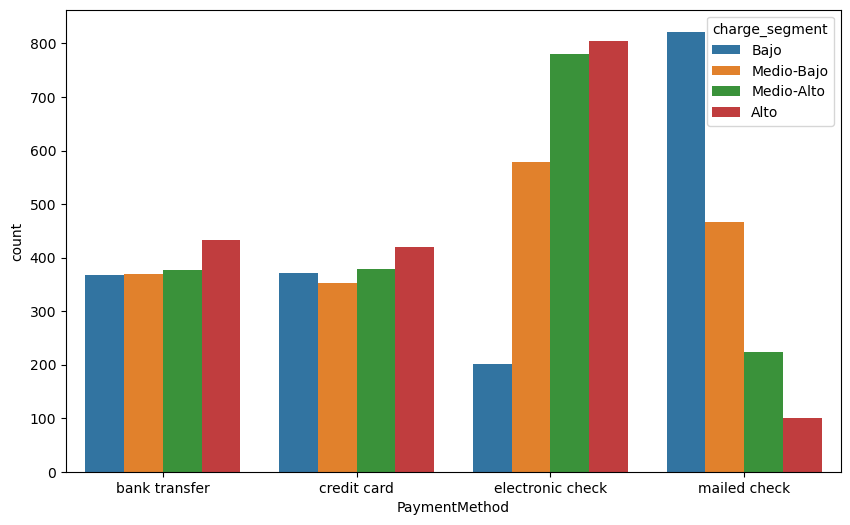

In [24]:
grouped5 = df.groupby(['PaymentMethod', 'charge_segment']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.barplot(x='PaymentMethod', y='count', hue='charge_segment', data=grouped5)
plt.show()

El gráfico muestra los métodos de pago preferidos según el segmento de cargo (bajo a alto). El cheque electrónico es el método más popular, especialmente entre clientes de cargo medio-alto y alto. Las transferencias bancarias y tarjetas de crédito muestran una distribución uniforme entre segmentos. El cheque por correo es más común entre clientes de cargo bajo, siendo el método menos utilizado en general.

C:\Users\guill\AppData\Local\Temp\ipykernel_16644\1188285980.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped6 = df.groupby(['tenure_segment', 'Churn']).size().reset_index(name='count')


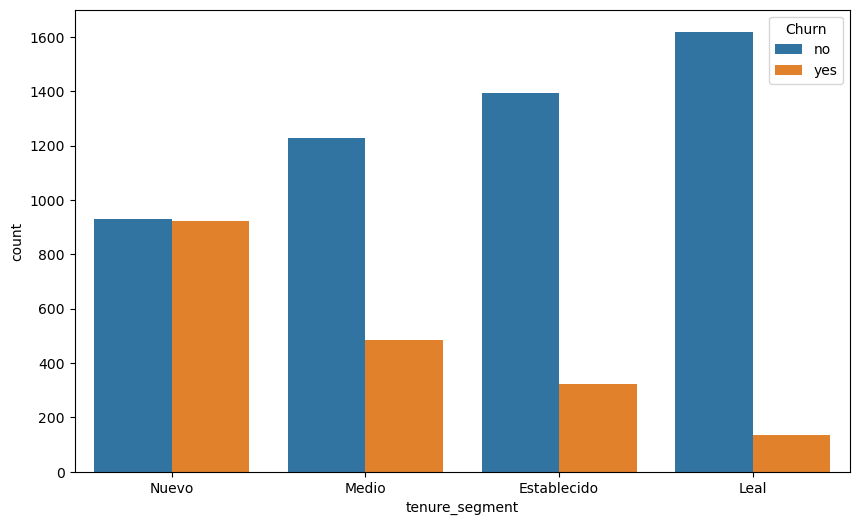

In [25]:
grouped6 = df.groupby(['tenure_segment', 'Churn']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.barplot(x='tenure_segment', y='count', hue='Churn', data=grouped6)
plt.show()

El gráfico muestra la relación entre la permanencia del cliente (tenure_segment) y la tasa de abandono (churn). Se observa que los clientes nuevos tienen la mayor tasa de abandono, casi igualando a los que permanecen, mientras que esta tasa disminuye significativamente conforme aumenta la antigüedad, siendo mínima en el segmento "Leal".

C:\Users\guill\AppData\Local\Temp\ipykernel_16644\1900054908.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped7 = df.groupby(['gender', 'Partner', 'Churn']).size().reset_index(name='count')


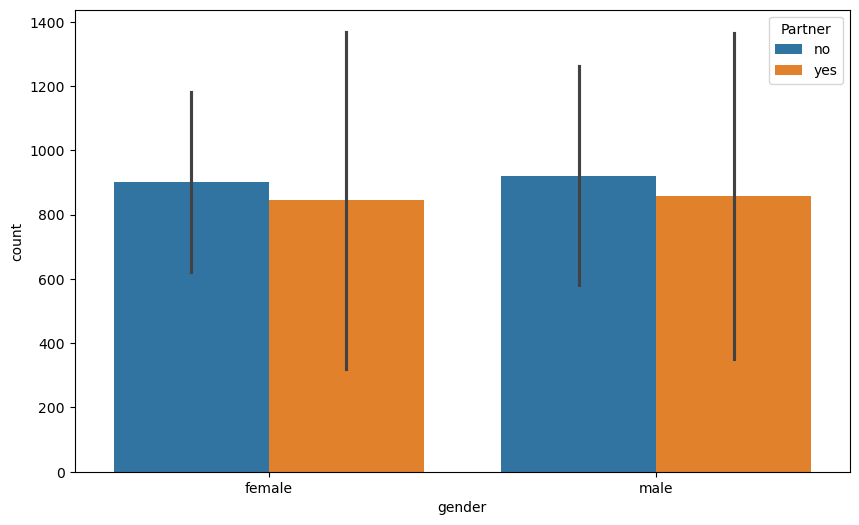

In [26]:
grouped7 = df.groupby(['gender', 'Partner', 'Churn']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='count', hue='Partner', data=grouped7)
plt.show()

El gráfico muestra la distribución de clientes por género y estado de pareja (Partner). La distribución es bastante equilibrada tanto para hombres como mujeres, con aproximadamente 900 clientes sin pareja (azul) y 850 con pareja (naranja) en ambos géneros, mostrando una distribución muy similar entre ambos grupos.

C:\Users\guill\AppData\Local\Temp\ipykernel_16644\2229660215.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped8 = df.groupby(['PhoneService', 'charge_segment']).size().reset_index(name='count')


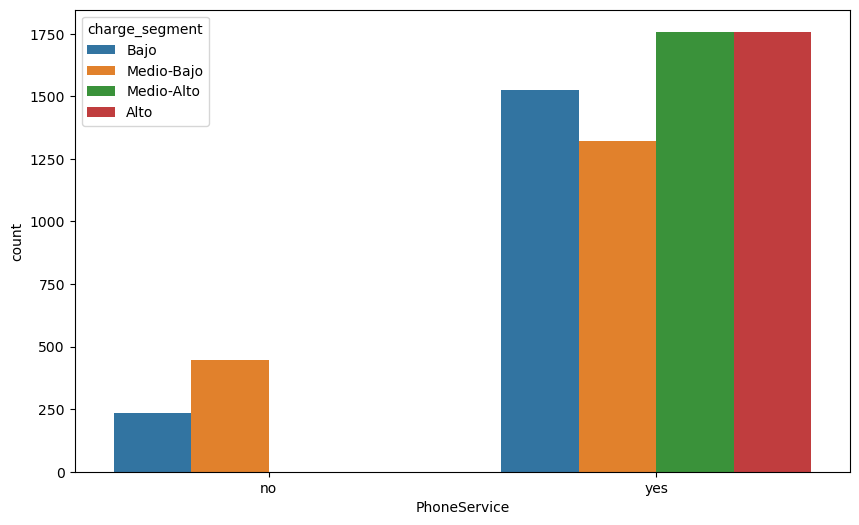

In [27]:
grouped8 = df.groupby(['PhoneService', 'charge_segment']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.barplot(x='PhoneService', y='count', hue='charge_segment', data=grouped8)
plt.show()

El gráfico muestra la relación entre el servicio telefónico y los segmentos de cargo. La mayoría de clientes tiene servicio telefónico (yes), con una distribución equilibrada entre todos los segmentos de cargo. Solo una pequeña proporción no tiene servicio telefónico (no), principalmente en los segmentos de cargo bajo y medio-bajo, aproximadamente 250 y 450 clientes respectivamente.

C:\Users\guill\AppData\Local\Temp\ipykernel_16644\3210842236.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped9 = df.groupby(['gender', 'OnlineSecurity']).size().reset_index(name='count')


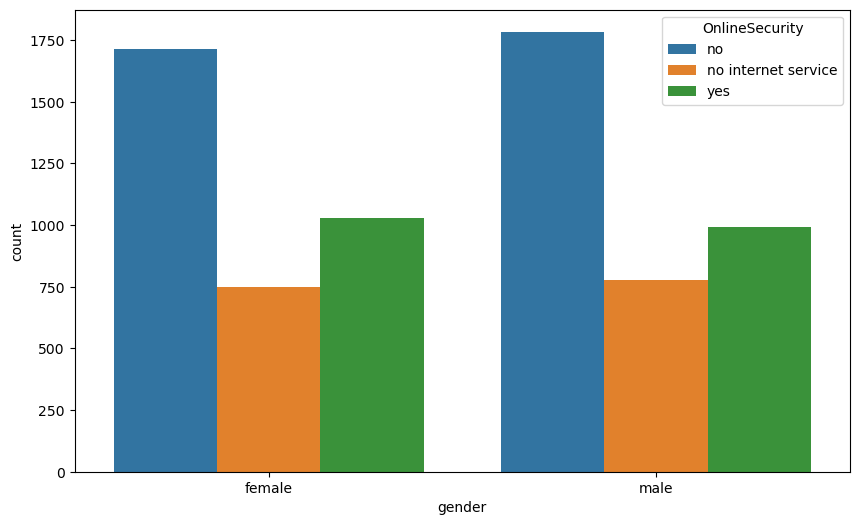

In [28]:
grouped9 = df.groupby(['gender', 'OnlineSecurity']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='count', hue='OnlineSecurity', data=grouped9)
plt.show()

tanto para hombres como mujeres, la mayoría de los usuarios no tienen seguridad en línea (aproximadamente 1750 personas en cada género). La proporción de usuarios que tienen seguridad en línea es significativamente menor, con aproximadamente 1000 usuarios por género. El grupo más pequeño corresponde a aquellos sin servicio de internet, con cerca de 750 usuarios por género.

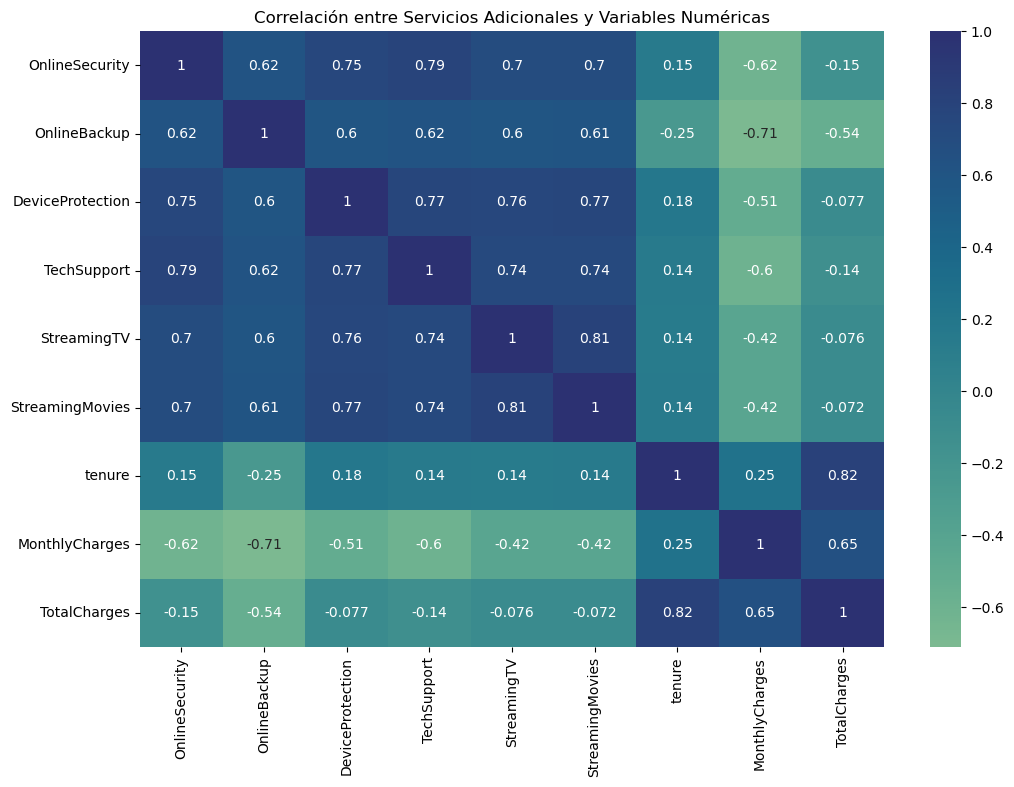

In [29]:
# Definir las columnas de servicios adicionales y numéricas
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Convertir las columnas de servicios a valores numéricos para poder calcular la correlación
service_data = df[service_cols].apply(lambda x: pd.factorize(x)[0])

# Unir columnas de servicios con columnas numéricas
combined_data = pd.concat([service_data, df[numerical_cols]], axis=1)

# Calcular y visualizar la correlación
plt.figure(figsize=(12, 8))
correlation = combined_data.corr()
sns.heatmap(correlation, annot=True, cmap='crest', center=0)
plt.title('Correlación entre Servicios Adicionales y Variables Numéricas')
plt.show()

La matriz de correlación revela varios patrones clave:

Hay una fuerte correlación positiva (0.7-0.81) entre los servicios de streaming, seguridad en línea y soporte técnico, sugiriendo que los clientes tienden a contratar estos servicios en conjunto.

El tiempo de permanencia (tenure) tiene una correlación positiva fuerte (0.82) con los cargos totales, lo cual es lógico ya que a mayor tiempo, mayores cargos acumulados.

Los cargos mensuales muestran correlaciones negativas moderadas con los servicios adicionales, indicando que posiblemente haya descuentos por paquetes de servicios.

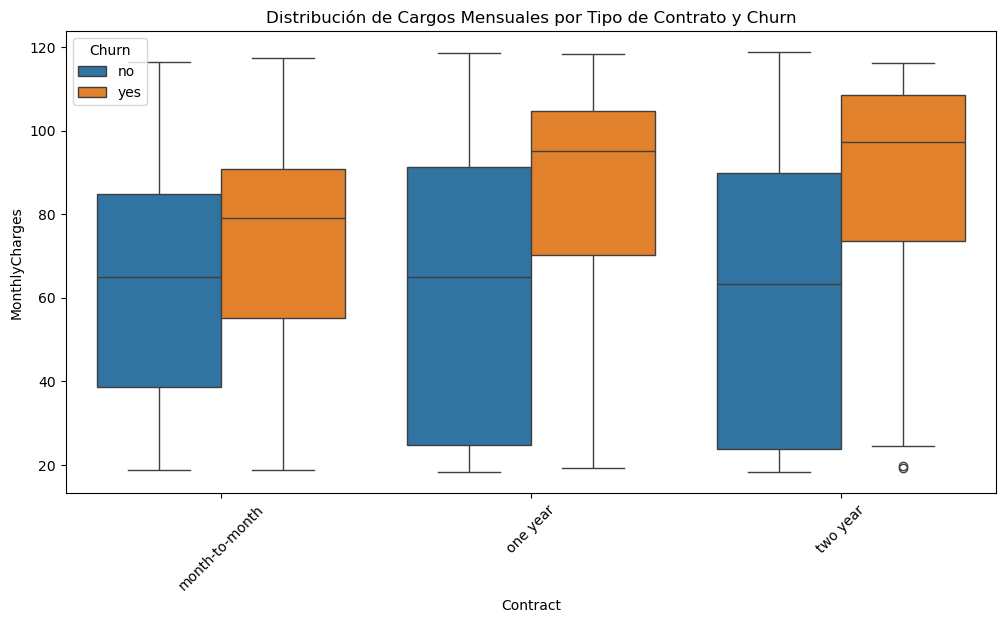


Tasa de Churn por Tipo de Contrato:
Churn                 no       yes
Contract                          
month-to-month  0.572903  0.427097
one year        0.887305  0.112695
two year        0.971681  0.028319


C:\Users\guill\AppData\Local\Temp\ipykernel_16644\1203241032.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_contract = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()


In [30]:
# Crear un gráfico de cajas para ver la distribución de cargos mensuales por tipo de contrato y churn
plt.figure(figsize=(12, 6))
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Distribución de Cargos Mensuales por Tipo de Contrato y Churn')
plt.xticks(rotation=45)
plt.show()

# Calcular las tasas de churn por tipo de contrato
churn_by_contract = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
print("\nTasa de Churn por Tipo de Contrato:")
print(churn_by_contract)

los clientes que abandonan (churn = yes) tienden a tener cargos mensuales más altos en todos los tipos de contrato, siendo más notable en contratos de dos años. Los contratos mes a mes muestran menores cargos mensuales en general, mientras que los contratos de mayor duración (one year y two year) presentan cargos más elevados. Esto sugiere una posible relación entre los cargos altos y la probabilidad de abandono, especialmente en contratos largos.

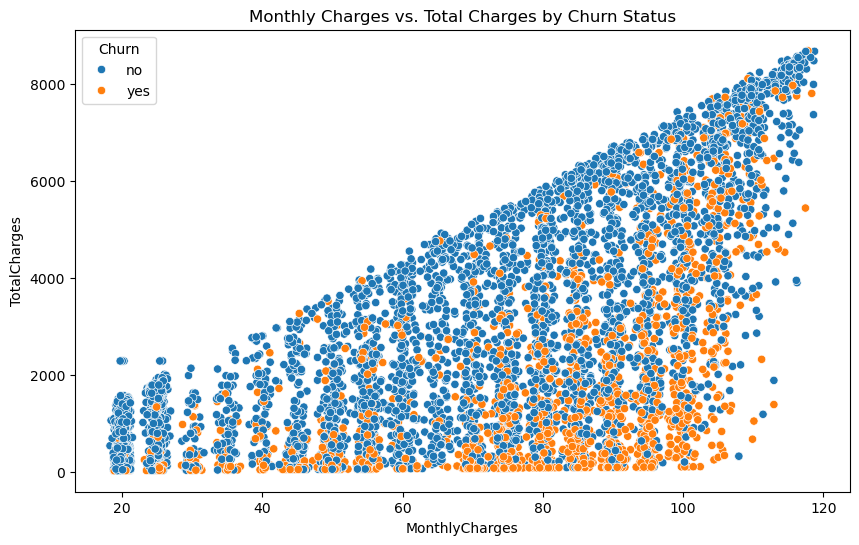

In [39]:
# 1. Cargos Mensuales vs Totales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df)
plt.title('Monthly Charges vs. Total Charges by Churn Status')
plt.show()

El gráfico de dispersión muestra una clara relación lineal positiva entre los cargos mensuales y los cargos totales. Los clientes que no abandonan (azul) tienden a acumular cargos totales más altos, mientras que los que abandonan (naranja) se concentran en la parte inferior del gráfico, sugiriendo que dejan el servicio antes de acumular cargos totales significativos. Se observa también que los cargos mensuales más altos (>80) tienen una mayor concentración de casos de abandono.

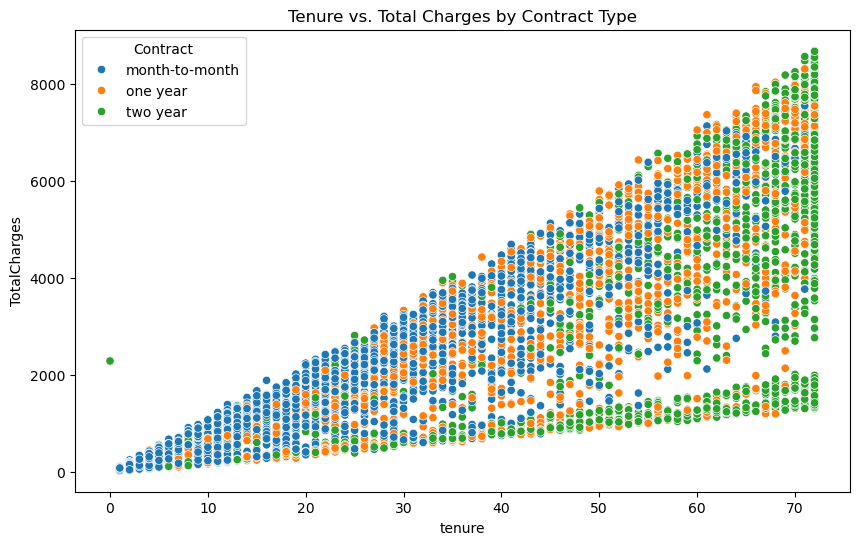

In [40]:
# 2. Tiempo como cliente vs Cargos Totales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='TotalCharges', hue='Contract', data=df)
plt.title('Tenure vs. Total Charges by Contract Type')
plt.show()

El gráfico muestra que los cargos totales aumentan con el tiempo de permanencia (tenure) para todos los tipos de contrato. Los contratos de dos años (verde) tienden a acumular cargos totales más altos en períodos largos (>50 meses). Los contratos mes a mes (azul) y de un año (naranja) muestran una dispersión similar, pero con una tendencia a cargos totales menores que los contratos de dos años. La relación entre tenure y cargos totales es más pronunciada después de los 40 meses de permanencia.

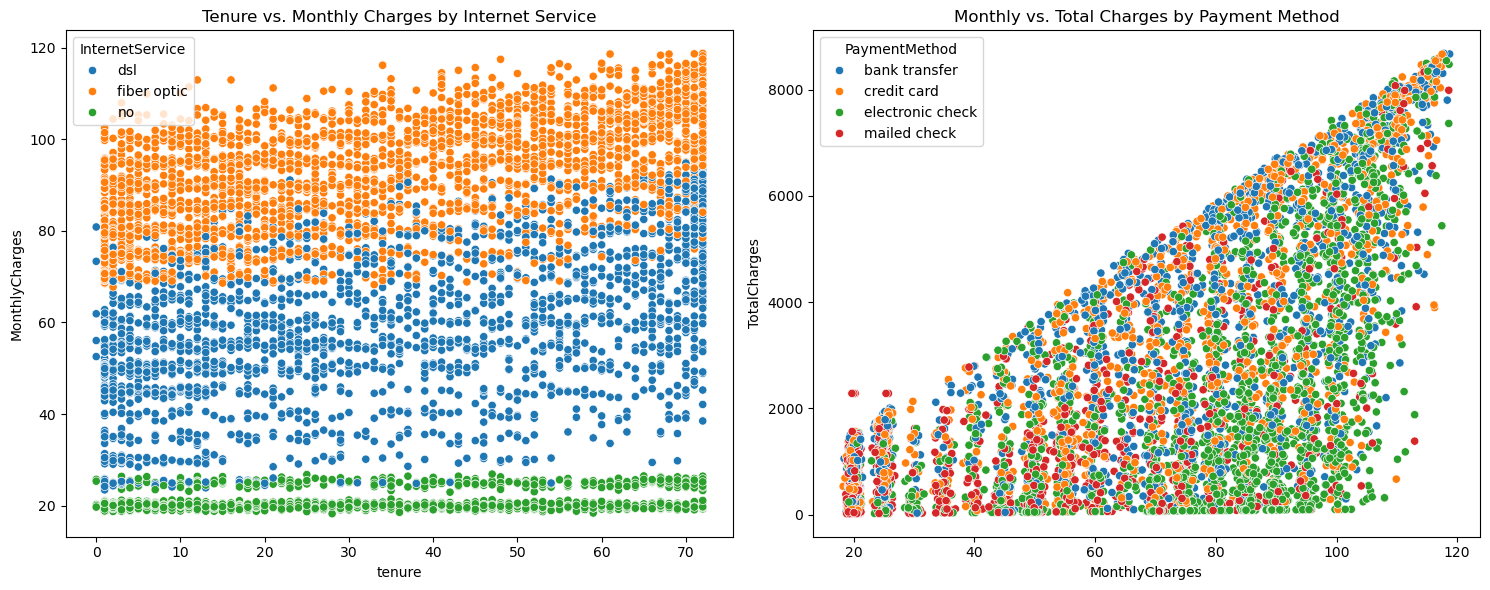

In [41]:
# 3. Múltiples scatterplots en una figura

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(ax=axes[0], x='tenure', y='MonthlyCharges', 
                hue='InternetService', data=df)
axes[0].set_title('Tenure vs. Monthly Charges by Internet Service')

sns.scatterplot(ax=axes[1], x='MonthlyCharges', y='TotalCharges', 
                hue='PaymentMethod', data=df)
axes[1].set_title('Monthly vs. Total Charges by Payment Method')

plt.tight_layout()
plt.show()

Las imágenes muestran las relaciones entre las características de los clientes y el uso que hacen de los servicios. El primer gráfico revela que los clientes con servicio de Internet por fibra óptica tienden a tener cargos mensuales más altos en comparación con aquellos que tienen DSL o no tienen servicio de Internet. El segundo gráfico muestra que los clientes que pagan con tarjeta de crédito o transferencia bancaria tienen cargos totales más altos, posiblemente debido a una mayor permanencia en el servicio o a servicios adicionales.

### Graficos Adicionales realizados con IA.

Obs: Los codigos fueron analizados y correjidos antes de usarlos, las IA generan muchos errores.

C:\Users\guill\AppData\Local\Temp\ipykernel_16644\2936218680.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_pcts = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)
C:\Users\guill\AppData\Local\Temp\ipykernel_16644\2936218680.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_pcts = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)
C:\Users\guill\AppData\Local\Temp\ipykernel_16644\2936218680.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retai

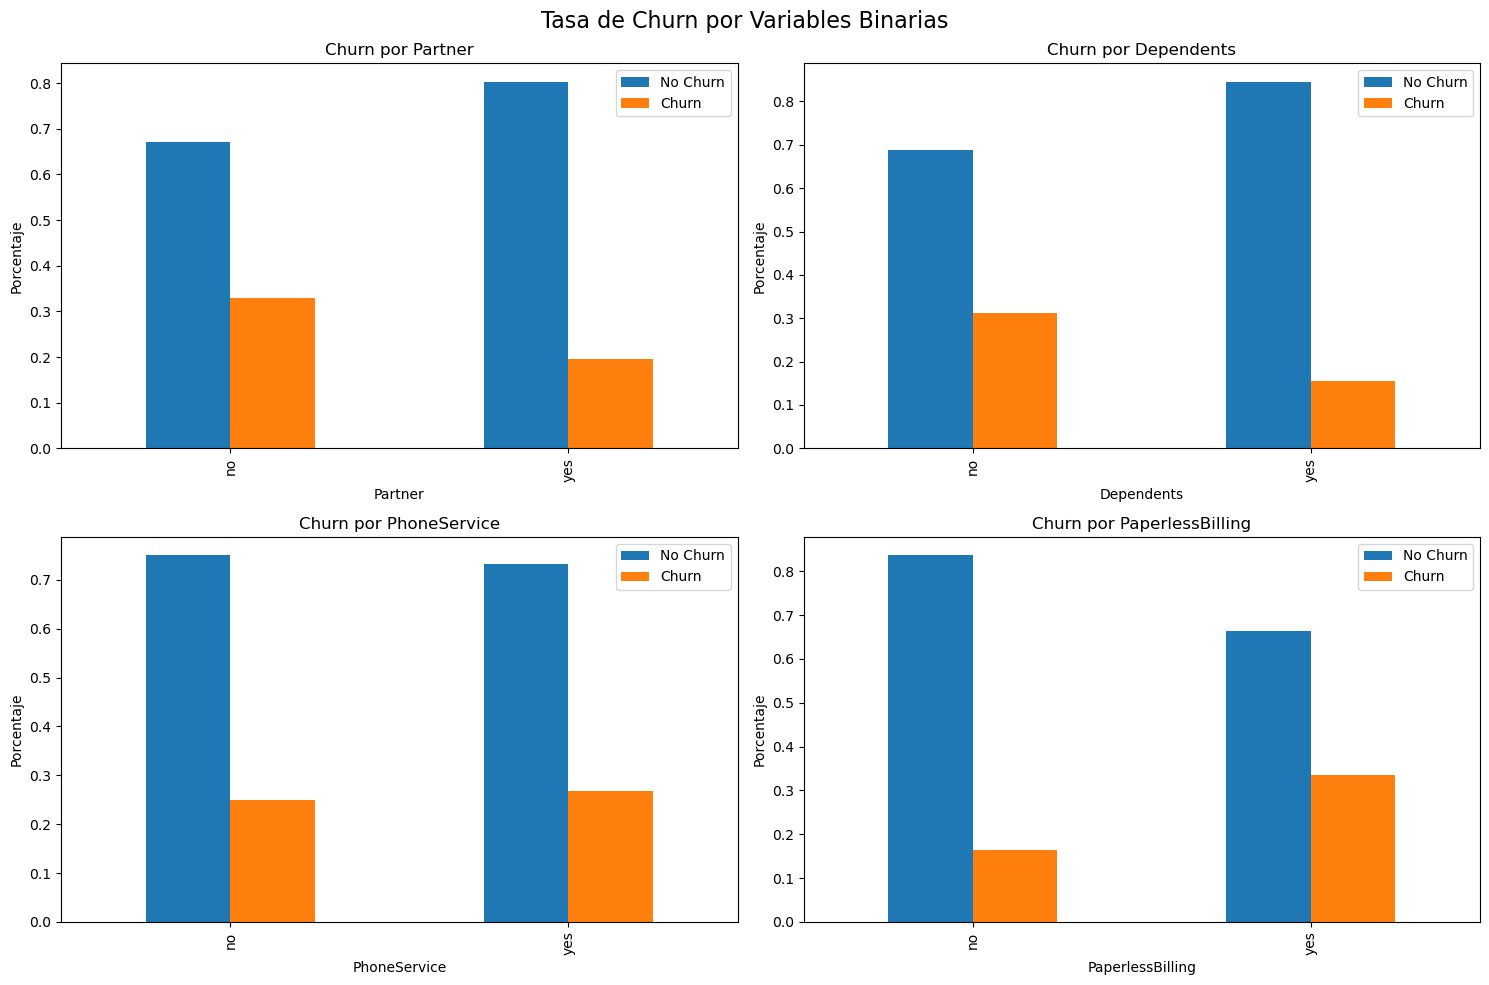

In [32]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'] # Definir las columnas binarias (yes/no)

# Configurar subgráficos
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Tasa de Churn por Variables Binarias', fontsize=16)

# Recorrer las columnas binarias y visualizar la tasa de churn
for idx, col in enumerate(binary_cols):
    row = idx // 2
    col_idx = idx % 2
    
    # Calcular porcentajes de churn por categoría
    churn_pcts = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    
    # Asegurar que los datos sean numéricos antes de graficar
    churn_pcts = churn_pcts.astype(float)
    
    # Crear gráfico de barras
    churn_pcts.plot(kind='bar', ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Churn por {col}')
    axes[row, col_idx].set_ylabel('Porcentaje')
    axes[row, col_idx].legend(['No Churn', 'Churn'])

plt.tight_layout()
plt.show()


1. Analizando variables binarias...


C:\Users\guill\AppData\Local\Temp\ipykernel_16644\1914463257.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_pcts = df.groupby(col)['Churn'].value_counts(normalize=True).unstack()
C:\Users\guill\AppData\Local\Temp\ipykernel_16644\1914463257.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_pcts = df.groupby(col)['Churn'].value_counts(normalize=True).unstack()
C:\Users\guill\AppData\Local\Temp\ipykernel_16644\1914463257.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior o

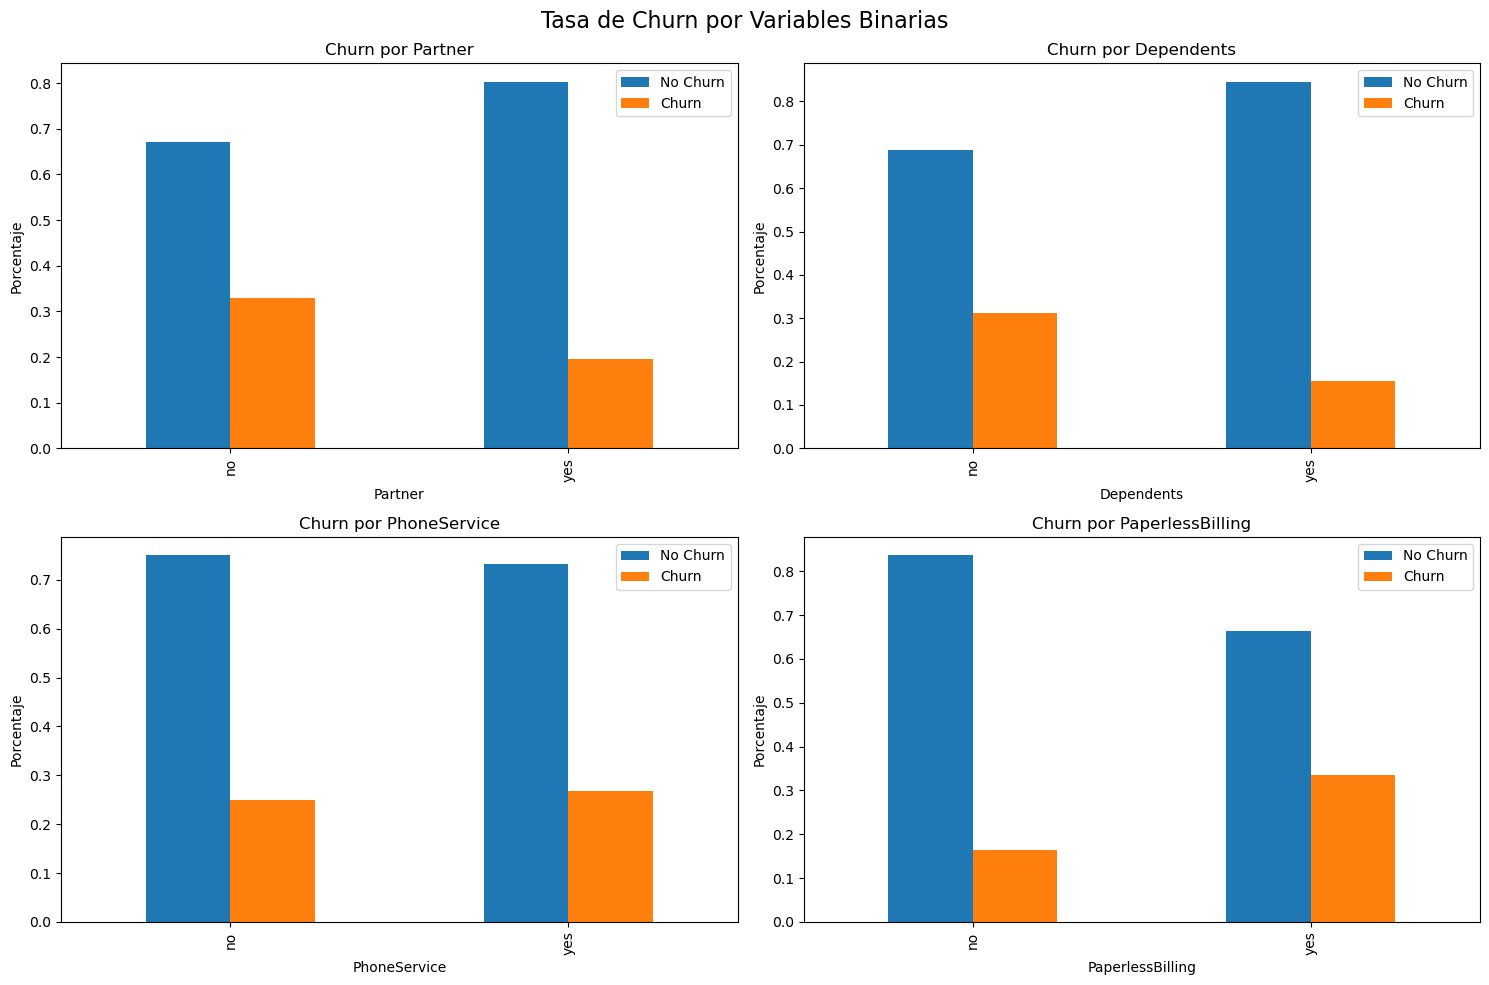


2. Analizando servicios y contratos...


C:\Users\guill\AppData\Local\Temp\ipykernel_16644\1914463257.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(service)['Churn'].value_counts(normalize=True).unstack()
C:\Users\guill\AppData\Local\Temp\ipykernel_16644\1914463257.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(service)['Churn'].value_counts(normalize=True).unstack()
C:\Users\guill\AppData\Local\Temp\ipykernel_16644\1914463257.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current be

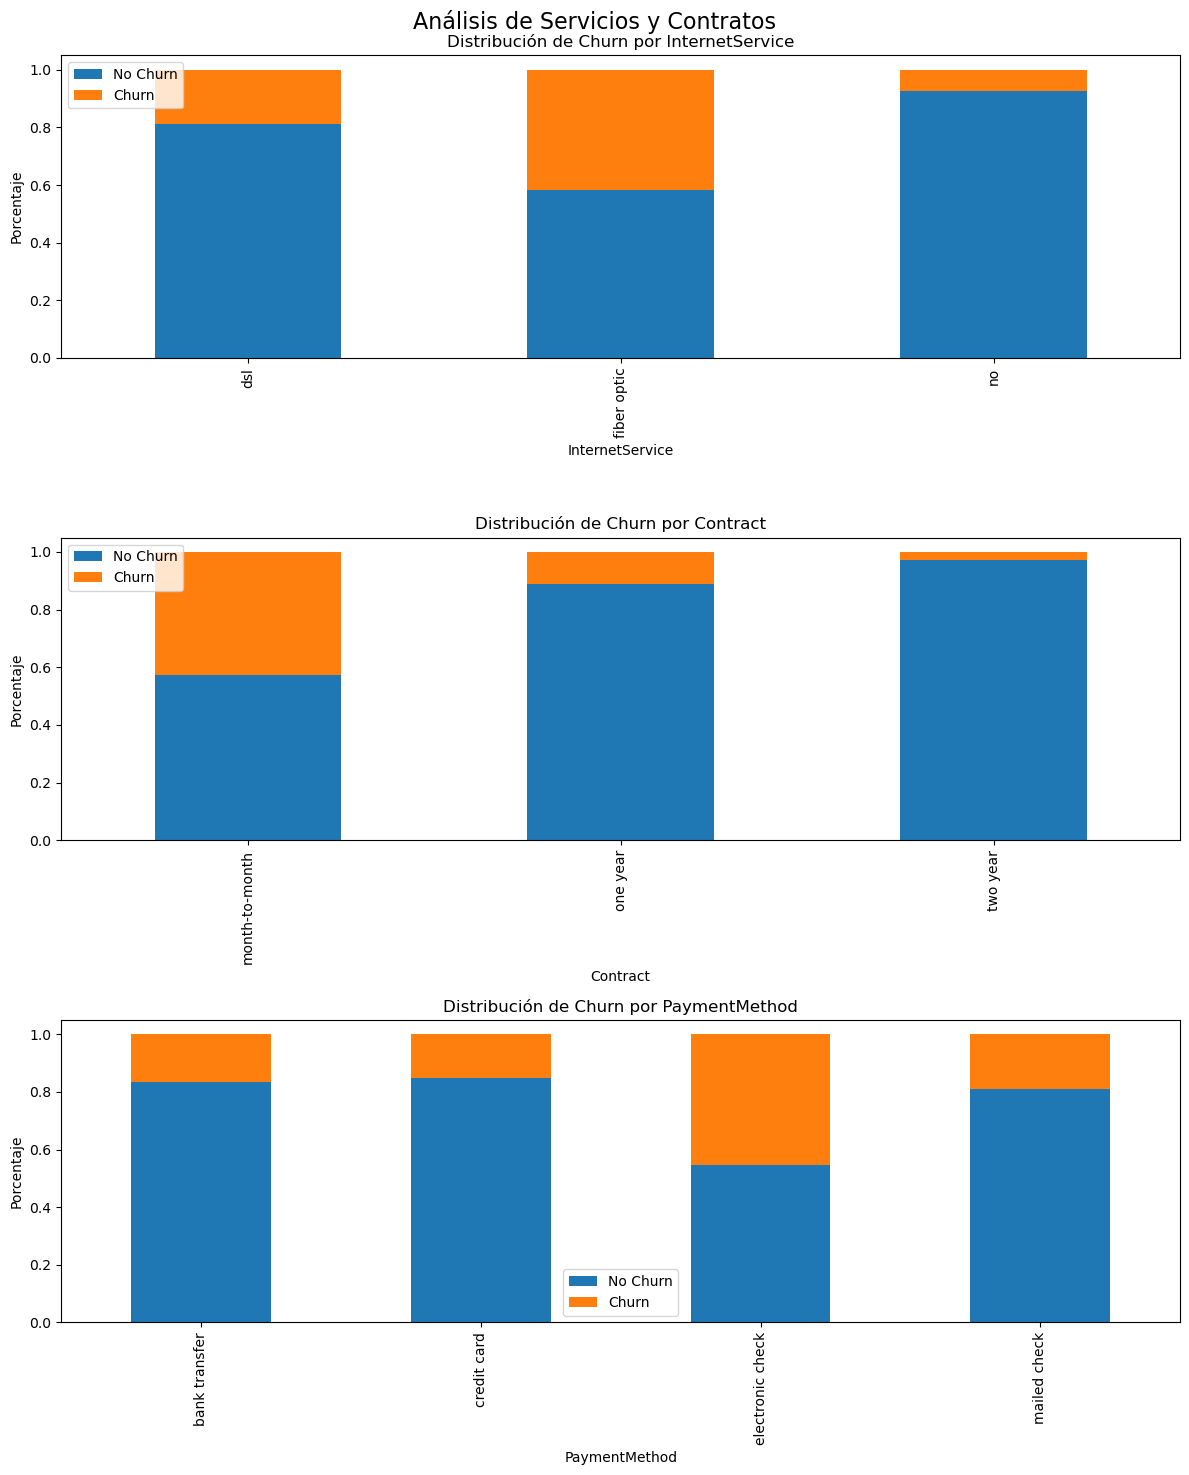


3. Analizando servicios adicionales...


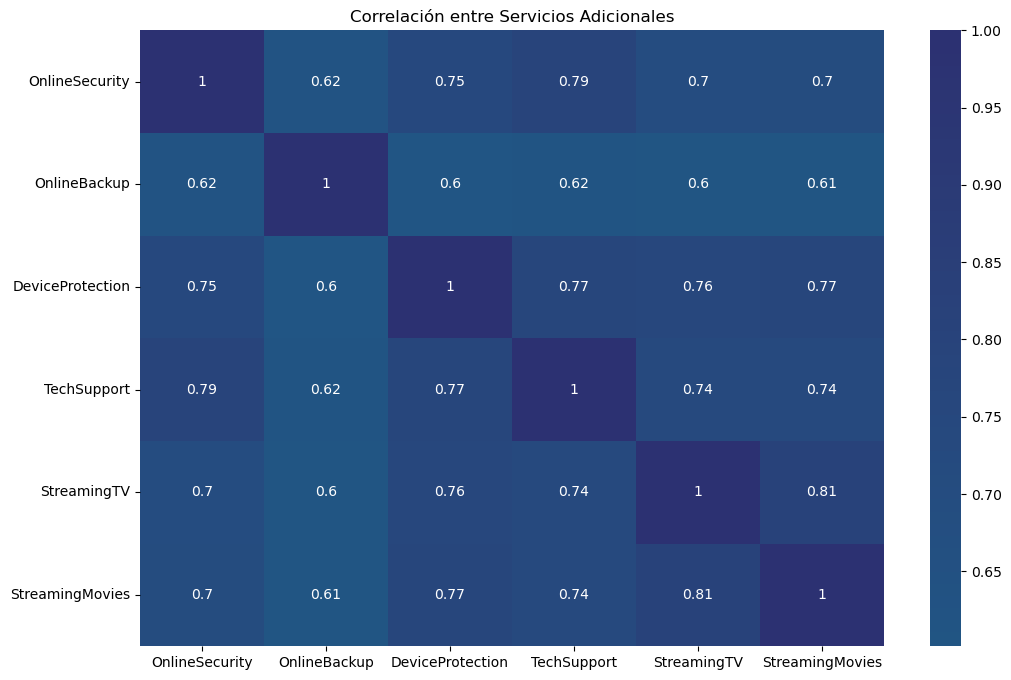

C:\Users\guill\AppData\Local\Temp\ipykernel_16644\1914463257.py:72: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(service)['Churn'].value_counts(normalize=True).unstack()
C:\Users\guill\AppData\Local\Temp\ipykernel_16644\1914463257.py:72: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(service)['Churn'].value_counts(normalize=True).unstack()
C:\Users\guill\AppData\Local\Temp\ipykernel_16644\1914463257.py:72: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current be

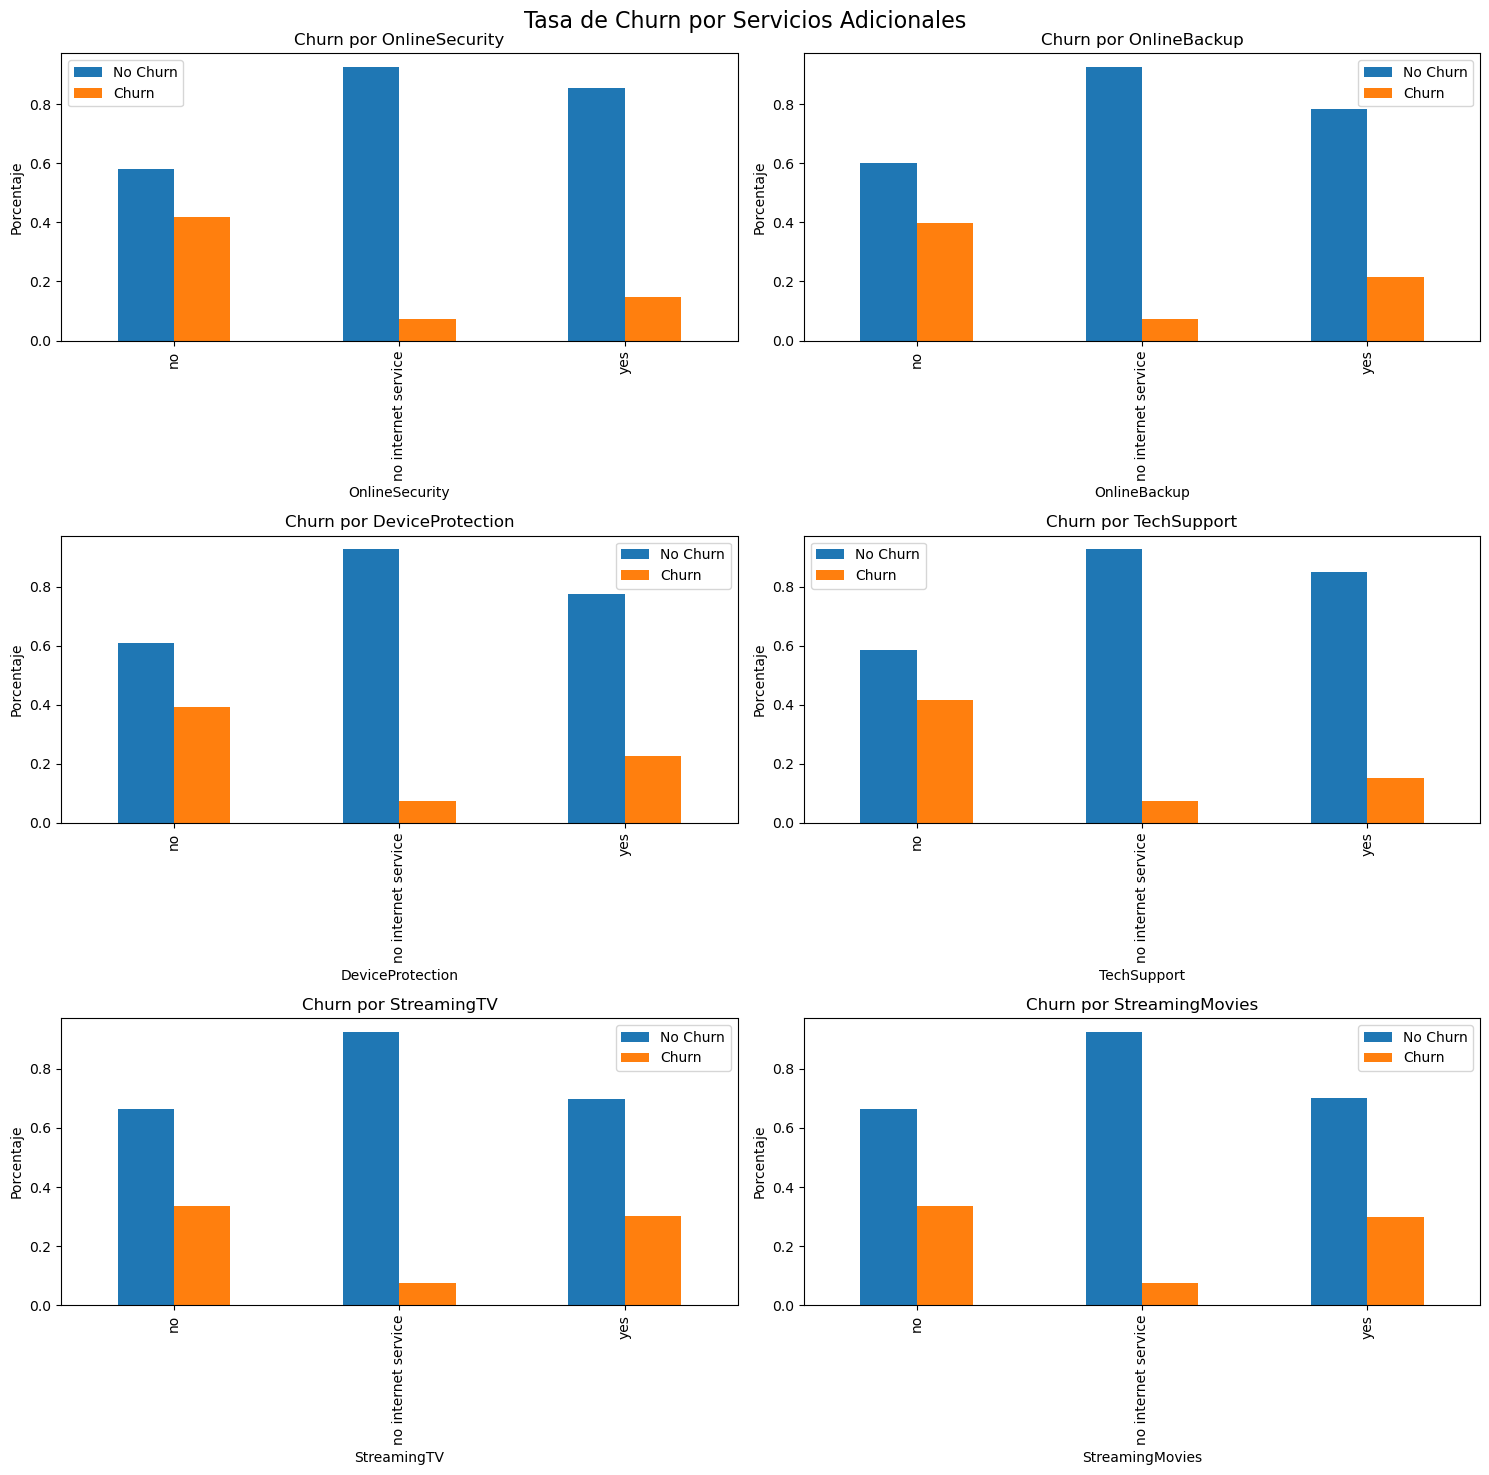


4. Analizando variables numéricas...


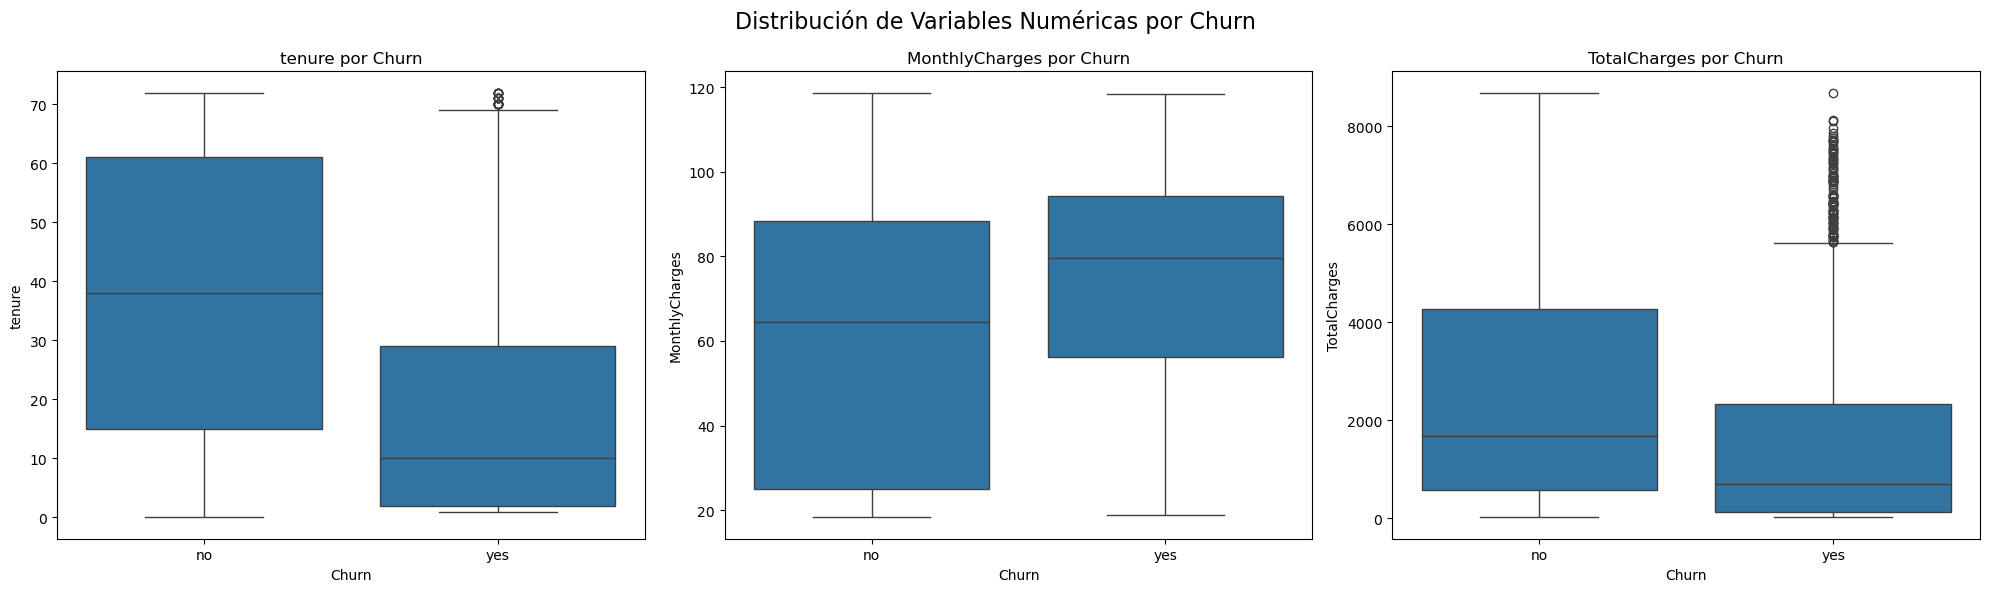


5. Analizando segmentos de clientes...


C:\Users\guill\AppData\Local\Temp\ipykernel_16644\1914463257.py:107: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('tenure_segment')['Churn'].value_counts(normalize=True).unstack()
C:\Users\guill\AppData\Local\Temp\ipykernel_16644\1914463257.py:113: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  charge_churn = df.groupby('charge_segment')['Churn'].value_counts(normalize=True).unstack()


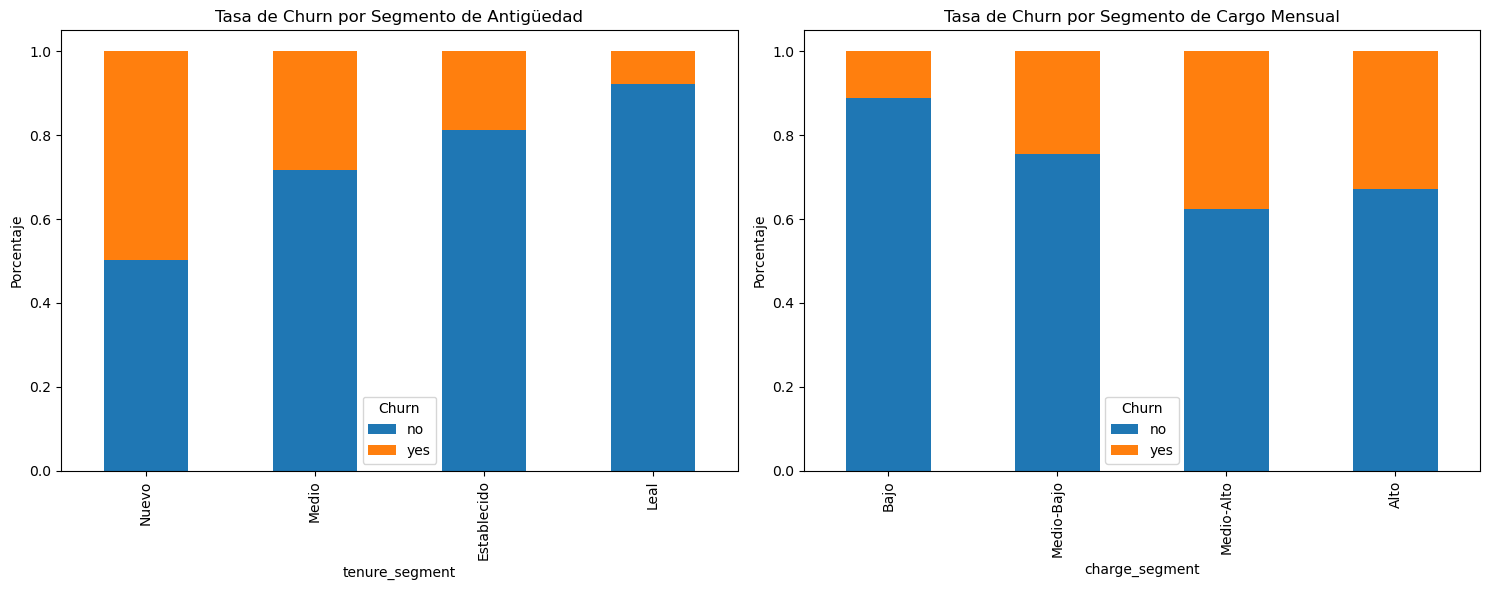

In [33]:
# 1. Análisis de variables binarias y su relación con Churn
def analizar_variables_binarias(df):
    # Variables binarias (sí/no)
    binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Tasa de Churn por Variables Binarias', fontsize=16)
    
    for idx, col in enumerate(binary_cols):
        row = idx // 2
        col_idx = idx % 2
        
        # Calcular porcentajes de churn por categoría
        churn_pcts = df.groupby(col)['Churn'].value_counts(normalize=True).unstack()
        
        # Crear gráfico de barras
        churn_pcts.plot(kind='bar', ax=axes[row, col_idx])
        axes[row, col_idx].set_title(f'Churn por {col}')
        axes[row, col_idx].set_ylabel('Porcentaje')
        axes[row, col_idx].legend(['No Churn', 'Churn'])
    
    plt.tight_layout()
    plt.show()

# 2. Análisis de servicios de internet y contratos
def analizar_servicios_contrato(df):
    services = ['InternetService', 'Contract', 'PaymentMethod']
    
    fig, axes = plt.subplots(3, 1, figsize=(12, 15))
    fig.suptitle('Análisis de Servicios y Contratos', fontsize=16)
    
    for idx, service in enumerate(services):
        # Calcular tasa de churn por servicio
        churn_rate = df.groupby(service)['Churn'].value_counts(normalize=True).unstack()
        
        # Crear gráfico de barras apiladas
        churn_rate.plot(kind='bar', stacked=True, ax=axes[idx])
        axes[idx].set_title(f'Distribución de Churn por {service}')
        axes[idx].set_ylabel('Porcentaje')
        axes[idx].legend(['No Churn', 'Churn'])
    
    plt.tight_layout()
    plt.show()

# 3. Análisis de servicios adicionales
def analizar_servicios_adicionales(df):
    service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                   'TechSupport', 'StreamingTV', 'StreamingMovies']
    
    # Crear figura para el heatmap de correlación
    plt.figure(figsize=(12, 8))
    
    # Convertir categorías a números para correlación
    service_data = df[service_cols].apply(lambda x: pd.factorize(x)[0])
    
    # Calcular correlación
    correlation = service_data.corr()
    
    # Crear heatmap
    sns.heatmap(correlation, annot=True, cmap='crest', center=0)
    plt.title('Correlación entre Servicios Adicionales')
    plt.show()
    
    # Análisis de tasa de churn por servicio
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    fig.suptitle('Tasa de Churn por Servicios Adicionales', fontsize=16)
    
    for idx, service in enumerate(service_cols):
        row = idx // 2
        col = idx % 2
        
        churn_rate = df.groupby(service)['Churn'].value_counts(normalize=True).unstack()
        churn_rate.plot(kind='bar', ax=axes[row, col])
        axes[row, col].set_title(f'Churn por {service}')
        axes[row, col].set_ylabel('Porcentaje')
        axes[row, col].legend(['No Churn', 'Churn'])
    
    plt.tight_layout()
    plt.show()

# 4. Análisis de variables numéricas
def analizar_variables_numericas(df):
    numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle('Distribución de Variables Numéricas por Churn', fontsize=16)
    
    for idx, col in enumerate(numeric_cols):
        sns.boxplot(x='Churn', y=col, data=df, ax=axes[idx])
        axes[idx].set_title(f'{col} por Churn')
    
    plt.tight_layout()
    plt.show()

# 5. Análisis de segmentación de clientes
def analizar_segmentos_clientes(df):
    # Crear segmentos basados en tenure
    df['tenure_segment'] = pd.qcut(df['tenure'], 4, labels=['Nuevo', 'Medio', 'Establecido', 'Leal'])
    
    # Crear segmentos basados en MonthlyCharges
    df['charge_segment'] = pd.qcut(df['MonthlyCharges'], 4, 
                                 labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Gráfico de tenure segments
    tenure_churn = df.groupby('tenure_segment')['Churn'].value_counts(normalize=True).unstack()
    tenure_churn.plot(kind='bar', stacked=True, ax=ax1)
    ax1.set_title('Tasa de Churn por Segmento de Antigüedad')
    ax1.set_ylabel('Porcentaje')
    
    # Gráfico de charge segments
    charge_churn = df.groupby('charge_segment')['Churn'].value_counts(normalize=True).unstack()
    charge_churn.plot(kind='bar', stacked=True, ax=ax2)
    ax2.set_title('Tasa de Churn por Segmento de Cargo Mensual')
    ax2.set_ylabel('Porcentaje')
    
    plt.tight_layout()
    plt.show()

# Función principal para ejecutar todos los análisis
def analizar_churn_completo(df):
    print("1. Analizando variables binarias...")
    analizar_variables_binarias(df)
    
    print("\n2. Analizando servicios y contratos...")
    analizar_servicios_contrato(df)
    
    print("\n3. Analizando servicios adicionales...")
    analizar_servicios_adicionales(df)
    
    print("\n4. Analizando variables numéricas...")
    analizar_variables_numericas(df)
    
    print("\n5. Analizando segmentos de clientes...")
    analizar_segmentos_clientes(df)

# Ejecutar el análisis completo
analizar_churn_completo(df)

### Análisis adicional:

Estadisticas Descriptivas de las columnas numericas

In [34]:
#El siguiente codigo es una copia del analisis del Profesor Iker del Bootcamp de Data Science de 2024.

# Vamos a usar una funcion para calcular las estadisticas descriptivas de la variable con las columnas numéricas.
def calcular_estadisticas(column, df):
    """
    Calcula estadísticas descriptivas para una columna numérica,
    omitiendo los valores nulos.

    Parámetros:
    - column (str): Nombre de la columna.
    - data (pd.Series): Serie de pandas con los datos de la columna.

    Retorna:
    - dict: Diccionario con las estadísticas calculadas.
    """
    estadisticas = {
        'Cuenta': int(np.sum(~np.isnan(df))),
        'Media': np.nanmean(df),
        'Mediana': np.nanmedian(df),
        'Desviación Estándar': np.nanstd(df, ddof=1),
        'Mínimo': np.nanmin(df),
        'Máximo': np.nanmax(df),
        '25% Percentil': np.nanpercentile(df, 25),
        '75% Percentil': np.nanpercentile(df, 75)
    }
    return estadisticas

# Crear un diccionario para almacenar las estadísticas
estadisticas_dict = {}
# Iterar sobre cada columna numérica y calcular las estadísticas
for columna in numerical_cols:
    datos_columna = df[columna].values
    estadisticas = calcular_estadisticas(columna, datos_columna)
    estadisticas_dict[columna] = estadisticas
# Convertir el diccionario a un DataFrame para una mejor visualización
estadisticas_df = pd.DataFrame(estadisticas_dict).T  # Transponer para que las columnas sean las filas
estadisticas_df = estadisticas_df[['Cuenta', 'Media', 'Mediana', 'Desviación Estándar', 
                                   'Mínimo', 'Máximo', '25% Percentil', '75% Percentil']]
# Redondear las estadísticas a 2 decimales
estadisticas_df = estadisticas_df.round(2)
# Mostrar el DataFrame formateado
print("\nEstadísticas Descriptivas (Redondeadas a 2 decimales):")
estadisticas_df


Estadísticas Descriptivas (Redondeadas a 2 decimales):


,Cuenta,Media,Mediana,Desviación Estándar,Mínimo,Máximo,25% Percentil,75% Percentil
tenure,7043.0,32.37,29.00,24.56,0.00,72.00,9.00,55.00
MonthlyCharges,7043.0,64.76,70.35,30.09,18.25,118.75,35.50,89.85
TotalCharges,7043.0,2283.30,1400.55,2265.00,18.80,8684.80,402.22,3786.60
